# Laboratorio 6: Creación de data tabular de ECG

### Definición de función para la creación de data tabular
Aqui se obtienen los datos en forma tabular, junto con un array de target para incluir la categoría:
| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Respiracion   | 1   | 
| Post-Ejercicio    | 2   |

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal as signal

def gen_dataset_ecg(filename, category, N=1000): # Ingresar archivo, categoría y tamaño por muestra
    array = np.genfromtxt(filename, delimiter="\t")
    d_sensor = array[:,-2]
    # Ajustar array para que sea divisible entre el periodo que se necesita
    siz = len(d_sensor)
    residue = siz % N
    d_sensor = d_sensor[residue:]

    Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
    Ts=1/Fs
    n = np.arange(0,d_sensor.shape[0])  # t = n*Ts
    # Obtener vector de tiempo
    t = n*Ts

    st_sensor = np.concatenate((t.reshape(-1,1),  d_sensor.reshape(-1,1)), axis=1)
    df = pd.DataFrame(st_sensor, columns=["t","d_sensor"])
    df = df.set_index("t")
    columns = int(siz/N)
    # Crear los datos tabulares acorde al tamaño por muestra especificado
    data = df[["d_sensor"]].values.reshape(columns,N)
    target = np.repeat(category, d_sensor.shape[0])
    return data, target


### Ploteo de señales y calculo aproximado del periodo en cada señal

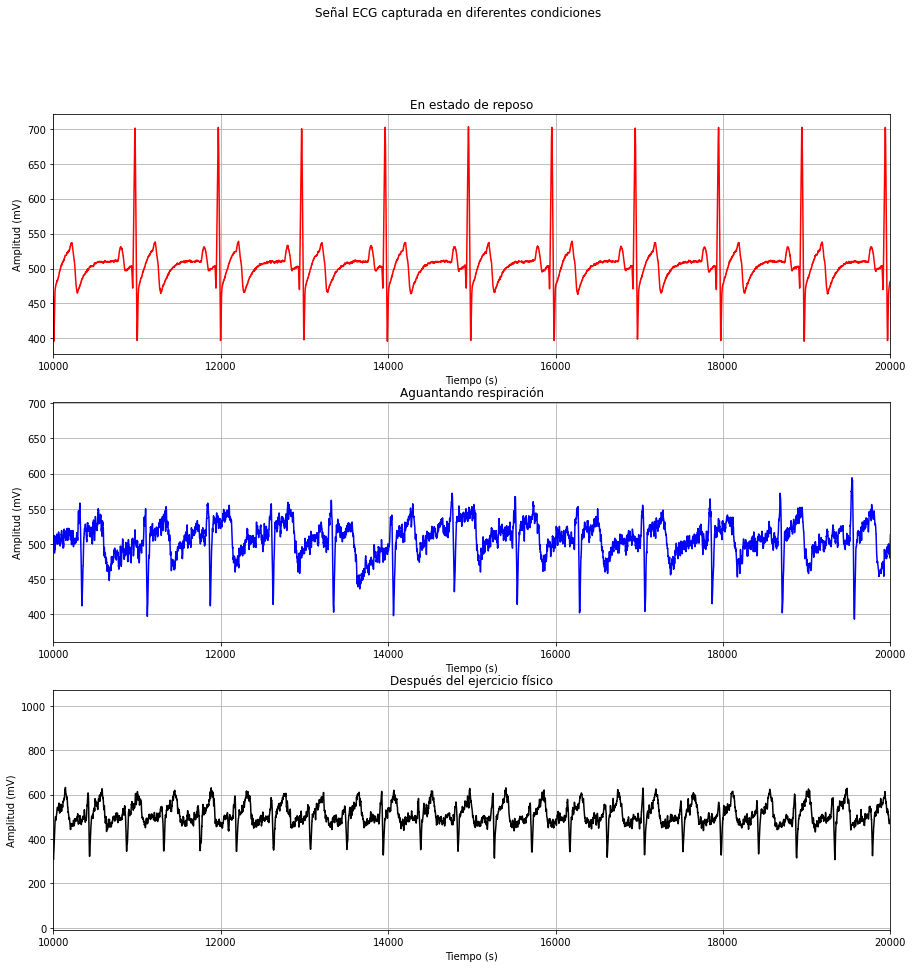

[ 975 1971] [ 341 1122] [171 617]
996 781 446


In [2]:
array1 = np.genfromtxt("ecg_reposo_fernando.txt", delimiter="\t")
array2 = np.genfromtxt("ecg_resp_a_fernando.txt", delimiter="\t")
array3 = np.genfromtxt("ecg_agitado_fernando.txt", delimiter="\t")
d_sensor1 = array1[:,-2]
d_sensor2 = array2[:,-2]
d_sensor3 = array3[:,-2]
fig2 = plt.figure(figsize=(15,15))
fig2.suptitle('Señal ECG capturada en diferentes condiciones')
plt.subplot(3, 1, 1); plt.plot(d_sensor1, "r"); plt.xlabel("Tiempo (s)"); plt.title("En estado de reposo");
plt.ylabel("Amplitud (mV)");plt.xlim([10000,20000]);plt.grid()
plt.subplot(3, 1, 2); plt.plot(d_sensor2, "b"); plt.xlabel("Tiempo (s)"); plt.title("Aguantando respiración");
plt.ylabel("Amplitud (mV)");plt.xlim([10000,20000]);plt.grid()
plt.subplot(3, 1, 3); plt.plot(d_sensor3, "k"); plt.xlabel("Tiempo (s)"); plt.title("Después del ejercicio físico")
plt.ylabel("Amplitud (mV)");plt.xlim([10000,20000]);plt.grid()

plt.show()
# Encontrar periodo aproximado
pk_loc1 = signal.find_peaks(d_sensor1[10000:12000], height=650)[0]# Localización de picos
pk_loc2 = signal.find_peaks(-d_sensor2[10000:11500], height=-425)[0]
pk_loc3 = signal.find_peaks(-d_sensor3[16000:16900], height=-400)[0]
print(pk_loc1,pk_loc2,pk_loc3)
N1 = pk_loc1[1] - pk_loc1[0]
N2 = pk_loc2[1] - pk_loc2[0] # Diferencia de tiempo entre 2 picos
N3 = pk_loc3[1] - pk_loc3[0]
print(N1, N2, N3) # Tiempo aproximado de periodo


### Obtención de datos tabulares acorde a los periodos encontrados por señal

(220, 996) (61, 781) (160, 446)
[[508. 508. 508. ... 516. 516. 516.]
 [516. 517. 517. ... 516. 516. 516.]
 [516. 517. 517. ... 515. 515. 516.]
 ...
 [511. 511. 511. ... 506. 506. 507.]
 [507. 507. 508. ... 508. 508. 507.]
 [508. 508. 508. ... 508. 508. 508.]] [[498. 496. 496. ... 496. 503. 503.]
 [505. 505. 496. ... 510. 515. 514.]
 [513. 508. 502. ... 501. 501. 502.]
 ...
 [503. 502. 500. ... 500. 499. 498.]
 [496. 494. 495. ... 460. 454. 450.]
 [451. 454. 455. ... 530. 530. 529.]] [[563. 575. 584. ... 569. 557. 546.]
 [539. 555. 583. ... 476. 465. 459.]
 [458. 464. 469. ... 520. 515. 511.]
 ...
 [451. 443. 443. ... 469. 467. 465.]
 [464. 463. 461. ... 613. 612. 611.]
 [609. 605. 608. ... 535. 533. 532.]]


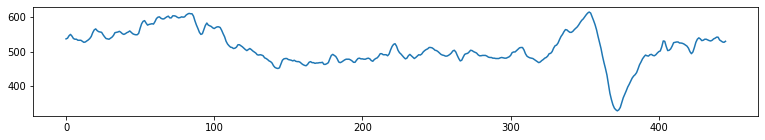

In [3]:
data1, target1 = gen_dataset_ecg("ecg_reposo_fernando.txt",0, N1)
data2, target2 = gen_dataset_ecg("ecg_resp_a_fernando.txt",1, N2)
data3, target3 = gen_dataset_ecg("ecg_agitado_fernando.txt",2, N3)
print(data1.shape, data2.shape, data3.shape)
print(data1, data2, data3)
# Plotear segmento deseado
plt.figure(figsize=(13,2))
plt.plot(data3[30])

### Obtención de datos tabulares acorde a un periodo normalizado a 1 segundo
Esto se realiza debido a que, para juntar todas las muestras de las 3 señales en un solo dataset, se necesita que posean la misma duración de muestras

(219, 1000) (47, 1000) (71, 1000)
[0 0 0 ... 0 0 0] [1 1 1 ... 1 1 1] [2 2 2 ... 2 2 2]


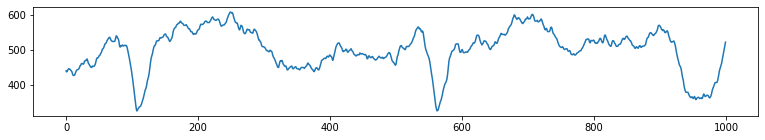

In [4]:
data1, target1 = gen_dataset_ecg("ecg_reposo_fernando.txt",0)
data2, target2 = gen_dataset_ecg("ecg_resp_a_fernando.txt",1)
data3, target3 = gen_dataset_ecg("ecg_agitado_fernando.txt",2)
print(data1.shape, data2.shape, data3.shape)
# Plotear segmento deseado
plt.figure(figsize=(13,2))
plt.plot(data3[30])
print(target1, target2, target3)

### Creación del dataset a partir de lo previo

In [5]:
data = np.vstack((data1, data2, data3))
target = np.hstack((target1, target2, target3))
target_names = np.array(["basal", "respiration", "post-exercise"])
ecg = {"data": data, "target": target, "target_names": target_names}
ecg

{'data': array([[508., 508., 508., ..., 495., 492., 490.],
        [488., 486., 484., ..., 487., 485., 483.],
        [480., 479., 477., ..., 478., 477., 476.],
        ...,
        [558., 554., 551., ..., 611., 611., 607.],
        [604., 603., 600., ..., 561., 563., 563.],
        [564., 570., 576., ..., 535., 533., 532.]]),
 'target': array([0, 0, 0, ..., 2, 2, 2]),
 'target_names': array(['basal', 'respiration', 'post-exercise'], dtype='<U13')}

In [9]:
np.savez('dataset.npz', **ecg)